<a href="https://colab.research.google.com/github/saltatt/Data-science-with-Python/blob/main/DSwPY_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_gdp=pd.read_csv('gdp.csv',encoding = 'cp1252')
df_gdp.head()

,unid,wbid,country,year,SES,gdppc,yrseduc,popshare
0,4,AFG,Afghanistan,1970,3.474212,709.00000,NaN,0.003097
1,4,AFG,Afghanistan,1920,26.968016,731.75677,NaN,0.003245
2,4,AFG,Afghanistan,1990,1.269530,604.00000,NaN,0.002347
3,4,AFG,Afghanistan,1960,15.763076,739.00000,NaN,0.003039
4,4,AFG,Afghanistan,2000,2.061114,565.00000,NaN,0.003309


In [ ]:
df_gdp_pivot = df_gdp.pivot(index='year', columns='country', values='gdppc')
df_gdp_pivot.head()

country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Bahrain,Bangladesh,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1880,585.46509,522.0000,819.18604,533.66669,1731.5,1041.0000,4285.0,2079.0,811.76746,566.66669,...,1041.0000,811.76746,3477.0,3184.0,2082.0,653.0,556.62793,811.76746,533.66669,533.66669
1890,635.93024,598.0000,923.37207,567.33331,2152.0,1139.0000,4458.0,2443.0,881.53491,587.33331,...,1139.0000,881.53491,4009.0,3392.0,2147.0,737.0,608.25580,881.53491,567.33331,567.33331
1900,686.39532,685.0000,1027.55810,601.00000,2756.0,1237.0000,4013.0,2882.0,951.30231,608.00000,...,1237.0000,951.30231,4492.0,4091.0,2219.0,821.0,659.88373,951.30231,601.00000,601.00000
1910,736.86047,780.0000,1131.74410,628.69232,3822.0,1430.0769,5210.0,3290.0,1021.06980,661.84613,...,1430.0769,1021.06980,4611.0,4964.0,3136.0,886.0,711.51166,1021.06980,628.69232,628.69232
1920,731.75677,861.3125,1201.21620,682.62964,3473.0,1432.9333,4766.0,2412.0,1242.91890,651.89191,...,1432.9333,3833.67580,4548.0,5552.0,2674.0,1173.0,713.94592,1017.21620,682.62964,682.62964


In [ ]:
df_sales = pd.read_excel('/content/supermarket_sales.xlsx')
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df_sales= df_sales.drop(columns=['Date','Time']).head()
df_sales.pivot_table(index='Gender',aggfunc='sum').round(1)

,Branch,City,Customer type,Invoice ID,Payment,Product line,Quantity,Rating,Tax 5%,Total,Unit price,cogs,gross income,gross margin percentage
Gender,,,,,,,,,,,,,,
Female,AC,YangonNaypyitaw,MemberNormal,750-67-8428226-31-3081,EwalletCash,Health and beautyElectronic accessories,12,18.7,30.0,629.2,90.0,599.2,30.0,9.5
Male,AAA,YangonYangonYangon,NormalMemberNormal,631-41-3108123-19-1176373-73-7910,Credit cardEwalletEwallet,Home and lifestyleHealth and beautySports and ...,22,21.1,69.7,1464.0,190.9,1394.2,69.7,14.3


In [ ]:
df_sales.pivot_table(index='Gender',values=['Quantity','Total'],aggfunc='sum').round(1)

,Quantity,Total
Gender,,
Female,12,629.2
Male,22,1464.0


In [ ]:
df_sales.pivot_table(index='Gender',columns = 'Product line',values='Total',aggfunc='sum').round(1)

Product line,Electronic accessories,Health and beauty,Home and lifestyle,Sports and travel
Gender,,,,
Female,80.2,549.0,NaN,NaN
Male,NaN,489.0,340.5,634.4


In [ ]:
df_population_raw= pd.read_csv('population_total.csv')
df_population_raw.head()

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09


In [ ]:
df_population_raw.dropna(inplace=True)

# Задания

In [ ]:
'''
Загрузите датасет gdp.csv. Создайте сводную таблицу с помощью pivot(), где индекс — 'country', столбцы — 'year', значения — 'SES'. Отобразите таблицу только для стран 'Albania' и 'Algeria' за период 1950–2010 годов.
'''
df_gdp_pivot = df_gdp.pivot(index='country', columns='year', values='SES')
df_gdp_pivot.loc[['Albania','Algeria'],1950:2010]

year,1950,1960,1970,1980,1990,2000,2010
country,,,,,,,
Albania,67.035362,69.429123,68.380905,69.502441,72.882904,72.464691,74.860367
Algeria,42.300919,32.900574,35.971504,45.943970,56.705368,59.640270,71.197067


In [ ]:
'''
В датасете supermarket_sales.xlsx попробуйте применить pivot() для индекса 'City', столбцов 'Customer type', значений 'gross income'. Объясните, почему может возникнуть ошибка (если возникает).
Затем используйте pivot_table() с aggfunc='mean' для той же структуры и округлите результат до 1 знака после запятой.
'''
#df_sales.pivot(index='City',columns='Customer type',values='gross income').round(1)

df_sales_pivot = df_sales.pivot_table(index='City',columns='Customer type',values='gross income',aggfunc='mean').round(1)
df_sales_pivot

Customer type,Member,Normal
City,,
Naypyitaw,NaN,3.8
Yangon,24.7,23.2


In [ ]:
#В supermarket_sales.xlsx создайте сводную таблицу: индекс — 'City', столбцы — 'Payment', значения — 'Quantity', aggfunc='mean'. Округлите до 2 знаков
df_sales_pivot = df_sales.pivot_table(index='City',columns='Payment',values='Quantity',aggfunc='mean').round(2)
df_sales_pivot

Payment,Cash,Credit card,Ewallet
City,,,
Naypyitaw,5.0,NaN,NaN
Yangon,NaN,7.0,7.33


In [ ]:
df_gdp

,unid,wbid,country,year,SES,gdppc,yrseduc,popshare
0,4,AFG,Afghanistan,1970,3.474212,709.00000,NaN,0.003097
1,4,AFG,Afghanistan,1920,26.968016,731.75677,NaN,0.003245
2,4,AFG,Afghanistan,1990,1.269530,604.00000,NaN,0.002347
3,4,AFG,Afghanistan,1960,15.763076,739.00000,NaN,0.003039
4,4,AFG,Afghanistan,2000,2.061114,565.00000,NaN,0.003309
...,...,...,...,...,...,...,...,...
2081,716,ZWE,Zimbabwe,1940,52.746567,813.00000,NaN,0.001113
2082,716,ZWE,Zimbabwe,2010,27.091389,1388.97300,NaN,0.002074
2083,716,ZWE,Zimbabwe,1990,59.110970,2526.07230,NaN,0.002039
2084,716,ZWE,Zimbabwe,1900,54.722645,601.00000,NaN,0.000996


In [ ]:
#В gdp.csv создайте pivot_table() с индексом 'year', столбцами 'country', значениями ['gdppc', 'popshare'], aggfunc='mean'. Выберите данные за 2000–2020 годы для стран 'Argentina' и 'Australia'.
df_gdp_pivot = df_gdp.pivot_table(index='year',columns='country',values=['gdppc', 'popshare'],aggfunc='mean')
df_gdp_pivot

gdppc                                                  \
country Afghanistan     Albania      Algeria      Angola  Argentina   
year                                                                  
1880      585.46509   522.00000    819.18604   533.66669   1731.500   
1890      635.93024   598.00000    923.37207   567.33331   2152.000   
1900      686.39532   685.00000   1027.55810   601.00000   2756.000   
1910      736.86047   780.00000   1131.74410   628.69232   3822.000   
1920      731.75677   861.31250   1201.21620   682.62964   3473.000   
1930      702.83783   929.57141   1255.81080   747.81482   4080.000   
1940      673.91895   965.28571   1310.40540   813.00000   4161.000   
1950      645.00000  1001.00000   1365.00000  1052.00000   4987.000   
1960      739.00000  1451.00000   2088.00000  1253.00000   5559.000   
1970      709.00000  2004.00000   2249.00000  1768.00000   7302.000   
1980      690.00000  2347.00000   3152.00000   961.00000   8206.000   
1990      604.00000  4557.40820  10238.88400  4806.43020  10833.503   
2000      565.00000  5470.01760  10211.10400  3831.00000  14924.374   
2010     1662.80350  9927.17580  12898.29600  6492.17680  18794.270   

                                                                   ...  \
country    Armenia  Australia    Austria      Bahrain  Bangladesh  ...   
year                                                               ...   
1880     1041.0000   4285.000   2079.000    811.76746   566.66669  ...   
1890     1139.0000   4458.000   2443.000    881.53491   587.33331  ...   
1900     1237.0000   4013.000   2882.000    951.30231   608.00000  ...   
1910     1430.0769   5210.000   3290.000   1021.06980   661.84613  ...   
1920     1432.9333   4766.000   2412.000   1242.91890   651.89191  ...   
1930     1448.0000   4708.000   3586.000   1529.94590   614.59460  ...   
1940     2144.0000   6166.000   3959.000   1816.97300   577.29730  ...   
1950     2841.0000   7412.000   3706.000   2104.00000   540.00000  ...   
1960     3945.0000   8791.000   6519.000   2843.00000   545.00000  ...   
1970     5575.0000  12024.000   9747.000   3788.00000   630.00000  ...   
1980     6116.5884  14412.000  13759.000   4388.00000   549.00000  ...   
1990     3735.5432  28572.076  31265.287  35112.55500  1290.43100  ...   
2000     2918.5576  35244.504  38812.051  44791.52000  1645.71730  ...   
2010     6507.9146  41363.215  43174.977  39912.69500  2451.30520  ...   

         popshare                                                              \
country   Ukraine United Arab Emirates United Kingdom United States   Uruguay   
year                                                                            
1880     0.015987             0.000027       0.024831      0.036187  0.000333   
1890     0.016265             0.000026       0.024827      0.041926  0.000454   
1900     0.016549             0.000026       0.025339      0.047034  0.000563   
1910     0.016546             0.000025       0.025386      0.052430  0.000611   
1920     0.015685             0.000026       0.024550      0.056043  0.000719   
1930     0.016369             0.000027       0.021845      0.058900  0.000816   
1940     0.016150             0.000028       0.020757      0.057089  0.000846   
1950     0.014899             0.000029       0.020309      0.061692  0.000889   
1960     0.014416             0.000031       0.017706      0.061050  0.000858   
1970     0.013115             0.000066       0.015503      0.057111  0.000783   
1980     0.011563             0.000235       0.013032      0.052583  0.000675   
1990     0.010091             0.000352       0.011133      0.048544  0.000605   
2000     0.008259             0.000512       0.009891      0.047387  0.000558   
2010     0.006807             0.001236       0.009315      0.045907  0.000501   

                                                           
country Venezuela   Vietnam     Yemen    Zambia  Zimbabwe  
year                                             

In [ ]:
#В gdp.csv создайте pivot_table() с индексом 'year', столбцами 'country', значениями ['gdppc', 'popshare'], aggfunc='mean'. Выберите данные за 2000–2020 годы для стран 'Argentina' и 'Australia'.
df_gdp_pivot = df_gdp.pivot_table(index='year',columns='country',values=['gdppc', 'popshare'],aggfunc='mean')

# Select data for Argentina and Australia for the years 2000 to 2020
selected_data = df_gdp_pivot.loc[2000:2020, [('gdppc', 'Argentina'), ('gdppc', 'Australia'), ('popshare', 'Argentina'), ('popshare', 'Australia')]]

# Display the selected data
display(selected_data)

gdppc             popshare          
country  Argentina  Australia Argentina Australia
year                                             
2000     14924.374  35244.504  0.006224  0.003217
2010     18794.270  41363.215  0.006118  0.003270

In [ ]:
df_population_raw= pd.read_csv('population_total.csv')

In [ ]:
#Используя population_total.csv, создайте сводную таблицу как в лекции (индекс 'year', столбцы 'country', значения 'population' для стран 'United States', 'India', 'China'). Постройте линейный график с помощью .plot(kind='line').

df_pivot = df_population_raw.pivot_table(index='year',columns='country',values='population')




In [ ]:
df_pivot = df_pivot[['United States', 'India', 'China']]

In [ ]:
df_pivot

country,United States,India,China
year,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08
1960.0,186720571.0,4.505477e+08,6.604081e+08
1965.0,199733676.0,4.991233e+08,7.242190e+08
1970.0,209513341.0,5.551898e+08,8.276014e+08
1975.0,219081251.0,6.231029e+08,9.262409e+08
1980.0,229476354.0,6.989528e+08,1.000089e+09
1985.0,240499825.0,7.843600e+08,1.075589e+09
1990.0,252120309.0,8.732778e+08,1.176884e+09
1995.0,265163745.0,9.639226e+08,1.240921e+09


In [ ]:
import matplotlib.pyplot as plt
df_pivot.plot(kind='line',xlabel = 'Year', ylabel = 'Population',title='Population of 3 countries',figsize= (10,6))
plt.show()

In [ ]:
df_pivot

country,United States,India,China
year,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08
1960.0,186720571.0,4.505477e+08,6.604081e+08
1965.0,199733676.0,4.991233e+08,7.242190e+08
1970.0,209513341.0,5.551898e+08,8.276014e+08
1975.0,219081251.0,6.231029e+08,9.262409e+08
1980.0,229476354.0,6.989528e+08,1.000089e+09
1985.0,240499825.0,7.843600e+08,1.075589e+09
1990.0,252120309.0,8.732778e+08,1.176884e+09
1995.0,265163745.0,9.639226e+08,1.240921e+09


In [ ]:
#Из population_total.csv возьмите данные за 2020 год, транспонируйте и постройте одиночный barplot для топ-5 стран по населению. Используйте color='blue'.
df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]



In [ ]:
df_pivot_2020 = df_pivot_2020.T
df_pivot_2020

year,2020.0
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09


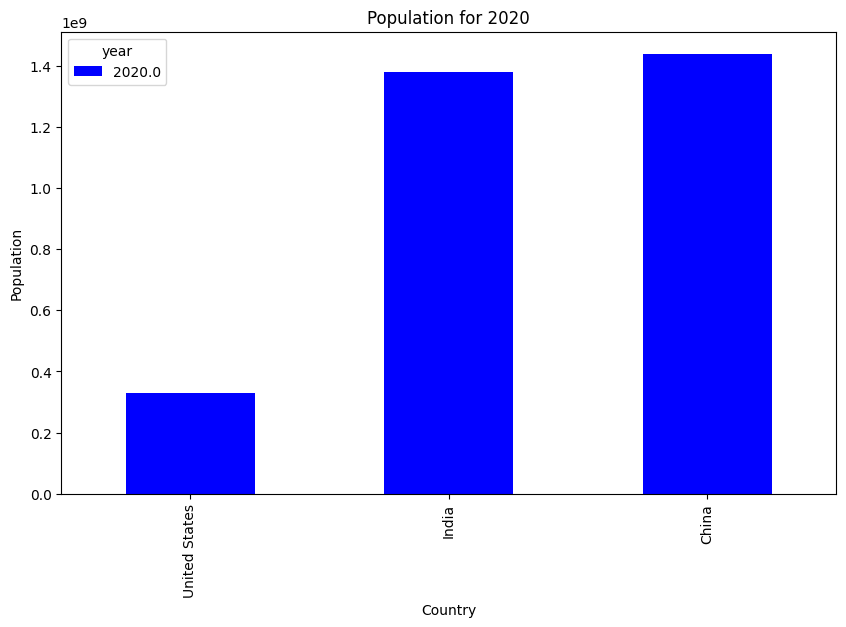

In [ ]:
#top5 = df_pivot_2020.sort_values(2020,ascending=True).head(5)
top5.plot(kind='bar',color='blue',xlabel = 'Country', ylabel = 'Population',title='Population for 2020',figsize= (10,6))
plt.show()

In [ ]:
df_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3


/tmp/ipython-input-1454987947.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_sales_pivot = df_sales.pivot_table(index=pd.Grouper(key='Date', freq='M'), columns='Product line', values='Total', aggfunc='sum')


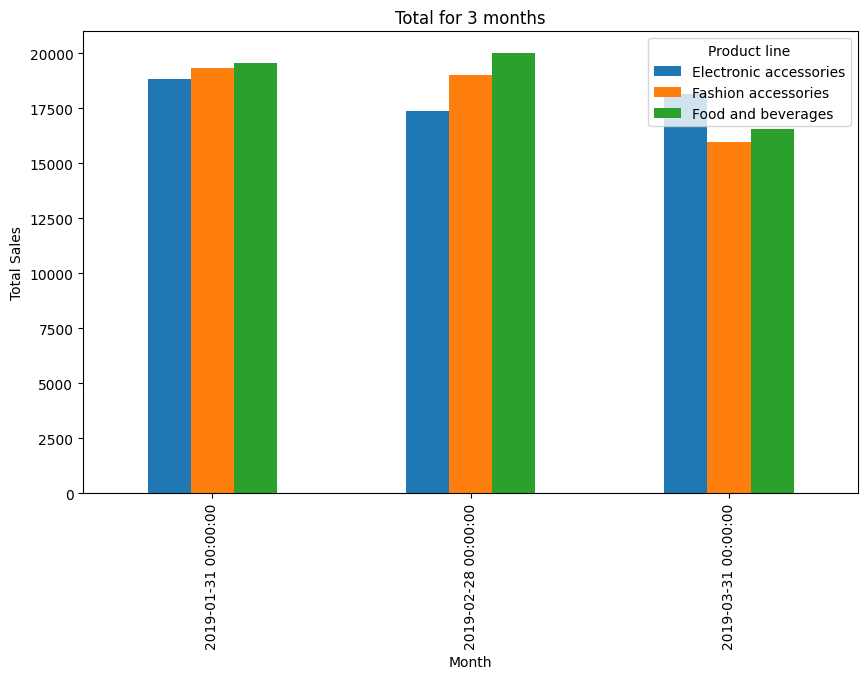

In [ ]:
df_sales=pd.read_excel('/content/supermarket_sales.xlsx')
#В supermarket_sales.xlsx создайте pivot_table() с индексом 'Date' (группируйте по месяцам, если нужно), столбцами 'Product line', значениями 'Total', aggfunc='sum'. Постройте группированный barplot для 3 месяцев.
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales_pivot = df_sales.pivot_table(index=pd.Grouper(key='Date', freq='M'), columns='Product line', values='Total', aggfunc='sum')
df_sales_3m=df_sales_pivot.iloc[:,:3]
df_sales_3m.plot(kind='bar',xlabel = 'Month', ylabel = 'Total Sales',title='Total for 3 months',figsize= (10,6))
plt.show()

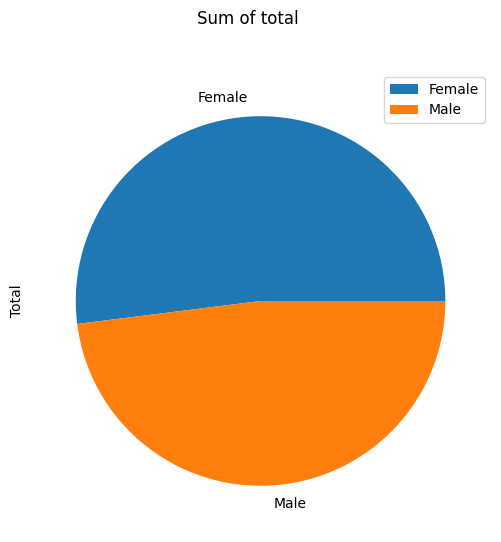

In [ ]:
#В supermarket_sales.xlsx создайте pivot_table() с индексом 'Gender', значениями 'Total', aggfunc='sum'. Постройте piechart, показывающий долю продаж по полу.
df_sales_pivot = df_sales.pivot_table(index='Gender', values='Total', aggfunc='sum')
df_sales_pivot.plot(kind='pie',y = 'Total' ,title = 'Sum of total',subplots=True,figsize= (10,6))
plt.show()

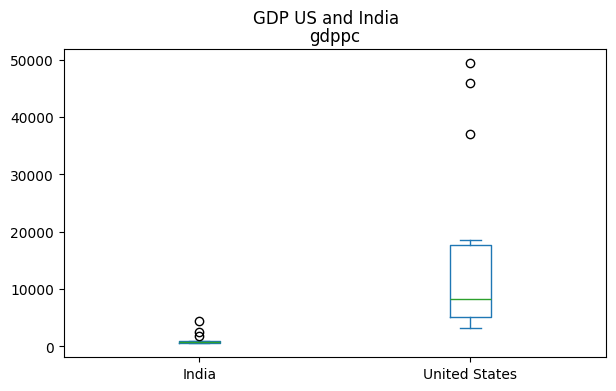

In [ ]:
df_gdp=pd.read_csv('gdp.csv',encoding = 'cp1252')
#Из gdp.csv постройте boxplot для 'gdppc' по странам 'United States' и 'India' (сгруппируйте данные). Сравните распределения.
df_gdp = df_gdp[df_gdp['country'].isin(['United States','India'])]
df_gdp.plot(kind='box',column = 'gdppc',by = 'country',figsize=(7,4),title='GDP US and India')
plt.show()

<Axes: ylabel='Frequency'>

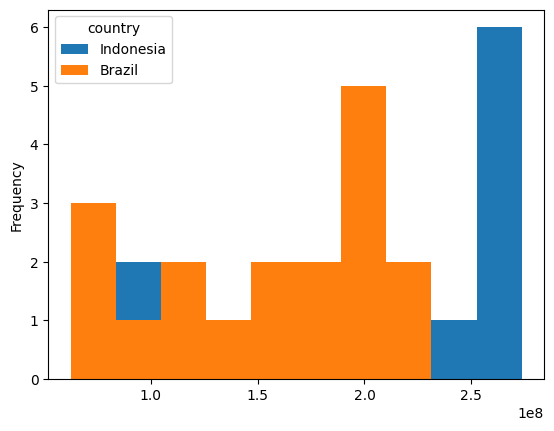

In [ ]:
df_population_raw= pd.read_csv('population_total.csv')
df_pivot = df_population_raw.pivot_table(index='year',columns='country',values='population',aggfunc='mean').round(2)

#В population_total.csv постройте histogram для 'population' стран 'Indonesia' и 'Brazil' с bins=10.
df_pivot[['Indonesia','Brazil']].plot(kind='hist', bins=10)

<function matplotlib.pyplot.show(close=None, block=None)>

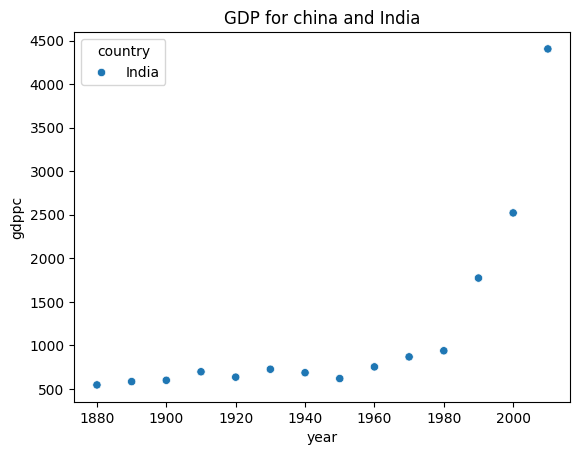

In [ ]:
#11.В gdp.csv постройте scatterplot: x='year', y='gdppc' для стран 'China' и 'India'. Добавьте цвета для различия стран.
import seaborn as sns
df_gdp = df_gdp[df_gdp['country'].isin(['China','India'])]
sns.scatterplot(data=df_gdp,x='year',y='gdppc',hue='country')
plt.title('GDP for china and India')
plt.show